Found 1272 files belonging to 3 classes.
Found 949 files belonging to 3 classes.
Class names: ['Bacterial leaf blight', 'brown spot', 'leaf smut']


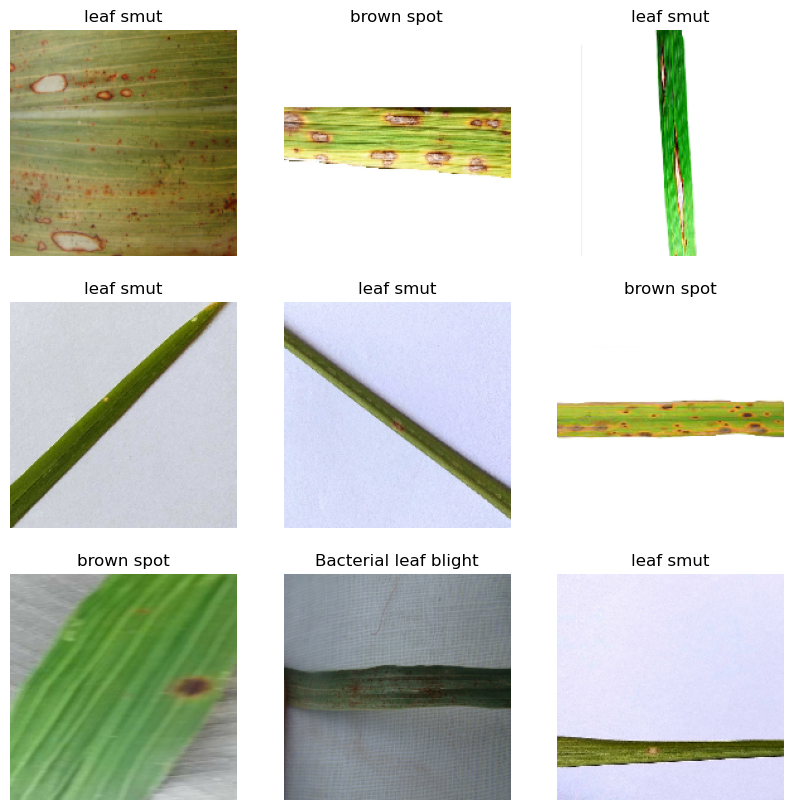

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 41, 41, 128)      

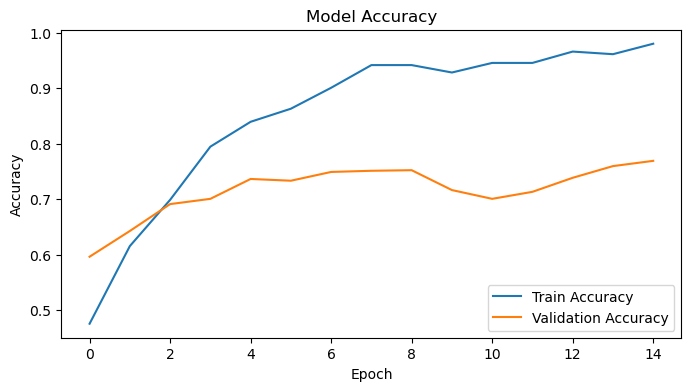

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Specify paths to your training and validation directories
train_dir = "C:/Users/dasar/OneDrive/Desktop/dataset/training"  # Replace with your path
val_dir = "C:/Users/dasar/OneDrive/Desktop/dataset/validation"    # Replace with your path

# Set parameters for loading the images
batch_size = 32
img_height = 180  # You can adjust based on your images
img_width = 180

# Load the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',            # Infers labels from subdirectory names
    label_mode='int',             # Can also be "categorical" for one-hot encoding
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True
)

# Load the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True
)

# Retrieve the class names
class_names = train_ds.class_names
print("Class names:", class_names)

# Visualize a few images from the training dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

# Optimize performance using caching and prefetching
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Define a simple CNN model
model = tf.keras.Sequential([
    # Rescaling layer to normalize pixel values to [0, 1]
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten and add dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),

    # Final output layer: number of units = number of classes
    tf.keras.layers.Dense(len(class_names))
])

# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Display the model's architecture
model.summary()

# Train the model
epochs = 15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# (Optional) Plot training & validation accuracy over epochs
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [6]:
# Load test dataset
test_dir = "C:/Users/dasar/OneDrive/Desktop/dataset/testing"

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=False
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")

Found 39 files belonging to 3 classes.
2/2 [==============================] - 0s 38ms/step - loss: 0.2982 - accuracy: 0.8974
Final Test Accuracy: 89.74%
